# An Analysis of Fielding in Baseball
-----------------------------------------------------------

Currently, the metric that is looked at the most when considering fielding in baseball is fielding percentage. While the FP gives a generic overview of a player's ability to field balls, it is not a wholly reliable statistic to rate a player.

The first thing I wanted to consider when making my own test statistic was the lack of double plays, passed balls and wild pitches in the fielding percentage formula which is defined as:

$ (Putouts + Assists)/(Putouts + Assists + Errors)$

I believe that a fielder's participation in a double play, passed ball or a wild pitch should affect their fielding percentage. Naively, I wanted to just throw in the variables that I thought were missing into the formula, so it would look something like this:

$ (Putouts + Assists + Double Plays)/(Putouts + Assists + Errors + Passed Ball + Wild Pitch)$

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt

In [21]:
local_path = 'baseballdatabank-master/core/Fielding.csv'

df= pd.read_csv(local_path)

df.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN


In [22]:
# Replace NaN values for PB, WP and DP
# dfClean= dfF.dropna(subset = ['DP', 'PB', 'WP'])

df.fillna(0,inplace=True)
df.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,0,SS,1,1.0,24.0,1,3,2.0,0,0.0,0.0,0.0,0.0,0.0
1,addybo01,1871,1,RC1,0,2B,22,22.0,606.0,67,72,42.0,5,0.0,0.0,0.0,0.0,0.0
2,addybo01,1871,1,RC1,0,SS,3,3.0,96.0,8,14,7.0,0,0.0,0.0,0.0,0.0,0.0
3,allisar01,1871,1,CL1,0,2B,2,0.0,18.0,1,4,0.0,0,0.0,0.0,0.0,0.0,0.0
4,allisar01,1871,1,CL1,0,OF,29,29.0,729.0,51,3,7.0,1,0.0,0.0,0.0,0.0,0.0


In [27]:
# Calculate our regular FP and new FP
dfF = df.copy()
dfF.drop(['stint', 'teamID','lgID','InnOuts'], axis=1)
dfF['rFP'] = (dfF['PO'] + dfF['A']) / (dfF['PO'] + dfF['A'] + dfF['E'])
dfF['nFP'] = (dfF['PO'] + dfF['A'] + dfF['DP']) / (dfF['PO'] + dfF['A'] + dfF['E'] + dfF['PB'] + dfF['WP'])
dfF.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,rFP,nFP
0,abercda01,1871,1,TRO,0,SS,1,1.0,24.0,1,3,2.0,0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667
1,addybo01,1871,1,RC1,0,2B,22,22.0,606.0,67,72,42.0,5,0.0,0.0,0.0,0.0,0.0,0.767956,0.795580
2,addybo01,1871,1,RC1,0,SS,3,3.0,96.0,8,14,7.0,0,0.0,0.0,0.0,0.0,0.0,0.758621,0.758621
3,allisar01,1871,1,CL1,0,2B,2,0.0,18.0,1,4,0.0,0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
4,allisar01,1871,1,CL1,0,OF,29,29.0,729.0,51,3,7.0,1,0.0,0.0,0.0,0.0,0.0,0.885246,0.901639


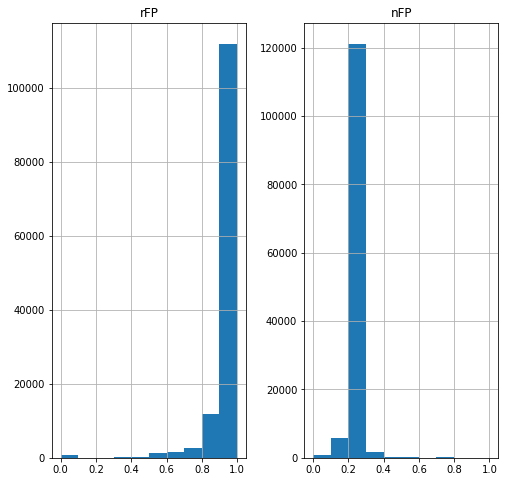

In [69]:
# Initialize figure 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))


#Normalize the values
maxv = dfF['nFP'].max()
dfF['nFP'] = dfF['nFP']/maxv

# Plot histogram 
dfF.hist(column="rFP", ax=ax[0]);
dfF.hist(column ="nFP", ax=ax[1]);

We can see that while the results are more varied, there is still a pretty big positive skew to the results. While we account for double plays in the equation, we are also accounting for the number of outs at the same time. We can weight the DP part of the equation by multiplying it by double plays per out.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000029E9497438>]],
      dtype=object)

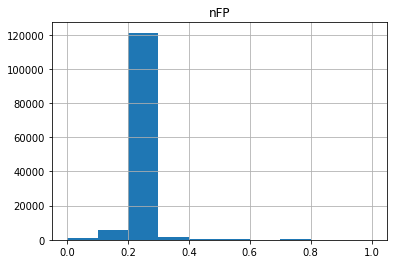

In [70]:
weight = (dfF['DP']+1)/(dfF['PO']+1)
dfF['nFP'] = (dfF['PO'] + dfF['A'] + dfF['DP'] * weight) / (dfF['PO'] + dfF['A'] + dfF['E'] + dfF['PB'] + dfF['WP'])

#Normalize the values
maxv = dfF['nFP'].max()
dfF['nFP'] = dfF['nFP']/maxv

dfF.hist(column ="nFP")

Now let's see if the new stat has a better correlation with the win loss ratio than the old Fielding percentage.

In [115]:
# Average nFP and rFP for teams sorted by year and team
df_P = dfF.groupby(['teamID', 'yearID'])[['nFP','rFP']].mean()

#Read in actual FP and Win/Loss ratio for the team from lahman - this is so we can compare
path = 'baseballdatabank-master/core/Teams.csv'

df_T= pd.read_csv(path)

df_T = df_T[['yearID', 'teamID', 'W', 'L', 'SB','CS','RA','SV','HA','BBA']]
df_T['W/L'] = df_T['W']/df_T['L']
df_T = df_T.groupby(['teamID', 'yearID'])[['W/L','SB','CS','RA','SV','HA','BBA']].mean()
df_T.head()

W/L     SB    CS   RA  SV    HA  BBA
teamID yearID                                           
ALT    1884    0.315789    NaN   NaN  216   0   292   52
ANA    1997    1.076923  126.0  72.0  794  39  1506  605
       1998    1.103896   93.0  45.0  783  52  1481  630
       1999    0.760870   71.0  45.0  826  37  1472  624
       2000    1.025000   93.0  52.0  869  46  1534  662

In [116]:
df_Combined = df_T.copy()
df_Combined['nFP'] = df_P['nFP'].copy()
df_Combined['rFP'] = df_P['rFP'].copy()
df_Combined.head()

W/L     SB    CS   RA  SV    HA  BBA       nFP       rFP
teamID yearID                                                               
ALT    1884    0.315789    NaN   NaN  216   0   292   52  0.179934  0.754810
ANA    1997    1.076923  126.0  72.0  794  39  1506  605  0.249335  0.971577
       1998    1.103896   93.0  45.0  783  52  1481  630  0.254171  0.970734
       1999    0.760870   71.0  45.0  826  37  1472  624  0.254373  0.971768
       2000    1.025000   93.0  52.0  869  46  1534  662  0.254475  0.963988

In [113]:
df_Combined.corr(method='pearson')

,W/L,W,SB,CS,RA,SV,HA,BBA,nFP,rFP
W/L,1.000000,0.613908,0.153882,-0.011888,-0.413108,0.083303,-0.234356,-0.217692,0.015665,0.037848
W,0.613908,1.000000,0.055051,0.123699,0.002462,0.506820,0.407514,0.377201,0.568563,0.602162
SB,0.153882,0.055051,1.000000,0.644230,0.040905,-0.271556,-0.130097,-0.173663,-0.368654,-0.339254
CS,-0.011888,0.123699,0.644230,1.000000,0.027080,-0.107576,0.188438,0.070636,0.079392,0.125619
RA,-0.413108,0.002462,0.040905,0.027080,1.000000,0.161947,0.806719,0.647580,0.276360,0.263281
SV,0.083303,0.506820,-0.271556,-0.107576,0.161947,1.000000,0.387293,0.461095,0.617438,0.591305
HA,-0.234356,0.407514,-0.130097,0.188438,0.806719,0.387293,1.000000,0.746575,0.645799,0.658253
BBA,-0.217692,0.377201,-0.173663,0.070636,0.647580,0.461095,0.746575,1.000000,0.656446,0.658598
nFP,0.015665,0.568563,-0.368654,0.079392,0.276360,0.617438,0.645799,0.656446,1.000000,0.944212
rFP,0.037848,0.602162,-0.339254,0.125619,0.263281,0.591305,0.658253,0.658598,0.944212,1.000000


- Performs about the same, if not worse in certain areas than FP
- TODO:Adjust to the past few years

## Does Position Matter?

- We've looked at double plays and wild pitches, but we haven't really considered the position of the fielder when they make plays. A fielder throwing an out from the outfield is a whole lot harder than the pitcher throwing an out at first base. By looking at the players FP at a certain position and comparing that to the league average, we can get an idea of the fielder's range.

In [126]:
df_Position = df.copy()
df_Position.drop(['stint','lgID','InnOuts'], axis=1)
df_Position['FP'] = (df_Position['PO'] + df_Position['A']) / (df_Position['PO'] + df_Position['A'] + df_Position['E'])
df_Position.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,FP
0,abercda01,1871,1,TRO,0,SS,1,1.0,24.0,1,3,2.0,0,0.0,0.0,0.0,0.0,0.0,0.666667
1,addybo01,1871,1,RC1,0,2B,22,22.0,606.0,67,72,42.0,5,0.0,0.0,0.0,0.0,0.0,0.767956
2,addybo01,1871,1,RC1,0,SS,3,3.0,96.0,8,14,7.0,0,0.0,0.0,0.0,0.0,0.0,0.758621
3,allisar01,1871,1,CL1,0,2B,2,0.0,18.0,1,4,0.0,0,0.0,0.0,0.0,0.0,0.0,1.000000
4,allisar01,1871,1,CL1,0,OF,29,29.0,729.0,51,3,7.0,1,0.0,0.0,0.0,0.0,0.0,0.885246


In [140]:
# Average fielding percentage per year
df_Position.groupby(['yearID'])[['PO','A','E','DP','PB','WP','FP']].mean()

,PO,A,E,DP,PB,WP,FP
yearID,,,,,,,
1871,32.891331,14.661483,8.910508,1.754431,2.592593,0.0,0.793003
1872,38.946765,17.597216,10.498575,1.951944,1.376190,0.0,0.764248
1873,42.876699,21.651828,13.132059,2.533154,2.112245,0.0,0.766016
1874,53.261601,25.990734,15.940900,2.350942,1.654378,0.0,0.742428
1875,41.847045,22.499141,11.406494,2.096334,2.199461,0.0,0.762045
1876,62.905793,29.807988,13.917246,2.881582,1.961039,0.0,0.811624
1877,59.259300,29.018197,10.942655,3.108854,3.205357,0.0,0.849502
1878,90.039816,40.799031,13.471964,5.263411,2.636905,0.0,0.863530
1879,70.128078,48.528730,14.057344,4.595446,3.079365,0.0,0.850477


In [141]:
# Average FP per position per year
df_Position.groupby(['yearID','POS'])[['PO','A','E','DP','PB','WP','FP']].mean()

PO           A          E         DP         PB   WP  \
yearID POS                                                                 
1871   1B   113.173913    1.782609   8.739130   4.913043   0.000000  0.0   
       2B    23.843750   21.843750   9.750000   2.593750   0.000000  0.0   
       3B    14.096774   18.032258  13.709677   1.000000   0.000000  0.0   
       C     35.777778    7.148148   8.074074   0.666667  18.148148  0.0   
       OF    21.876923    1.369231   4.707692   0.246154   0.000000  0.0   
       P      7.736842   20.421053   4.526316   0.894737   0.000000  0.0   
       SS    13.733333   32.033333  12.866667   1.966667   0.000000  0.0   
1872   1B   130.000000    1.517241   9.896552   5.034483   0.000000  0.0   
       2B    24.439024   24.707317  10.365854   3.073171   0.000000  0.0   
       3B    20.685714   25.857143  14.885714   1.314286   0.000000  0.0   
       C     55.233333   11.200000  12.033333   1.000000   9.633333  0.0   
       OF    20.130000    1.200000   4.680000   0.250000   0.000000  0.0   
       P      7.625000   23.041667   7.000000   0.791667   0.000000  0.0   
       SS    14.514286   35.657143  14.628571   2.200000   0.000000  0.0   
1873   1B   131.031250    2.875000  10.875000   6.062500   0.000000  0.0   
       2B    29.200000   28.600000  11.775000   4.250000   0.000000  0.0   
       3B    30.148148   37.592593  23.962963   2.185185   0.000000  0.0   
       C     58.107143   13.857143  13.642857   1.392857  14.785714  0.0   
       OF    28.063291    2.139241   7.405063   0.405063   0.000000  0.0   
       P      7.440000   23.440000   7.440000   0.760000   0.000000  0.0   
       SS    16.147059   43.058824  16.823529   2.676471   0.000000  0.0   
1874   1B   177.444444    3.296296  13.185185   5.962963   0.000000  0.0   
       2B    30.951220   31.365854  15.121951   3.609756   0.000000  0.0   
       3B    35.230769   42.807692  24.730769   2.461538   0.000000  0.0   
       C     67.612903   14.483871  20.387097   0.774194  11.580645  0.0   
       OF    32.725000    2.500000   8.700000   0.450000   0.000000  0.0   
       P     13.235294   45.823529  13.882353   0.882353   0.000000  0.0   
       SS    15.631579   41.657895  15.578947   2.315789   0.000000  0.0   
1875   1B   125.440678    2.305085   8.796610   4.525424   0.000000  0.0   
       2B    34.403509   36.877193  13.912281   3.771930   0.000000  0.0   
...                ...         ...        ...        ...        ...  ...   
2013   P      3.661157    7.341598   0.450413   0.509642   0.000000  0.0   
       SS    53.129771  105.129771   4.183206  22.916031   0.000000  0.0   
2014   1B   217.201058   16.984127   1.698413  20.402116   0.000000  0.0   
       2B    50.195402   78.988506   2.201149  17.609195   0.000000  0.0   
       3B    19.470238   53.767857   3.142857   5.261905   0.000000  0.0   
       C    333.123894   23.867257   2.610619   2.265487   3.026549  0.0   
       OF    92.041543    2.397626   1.376855   0.492582   0.000000  0.0   
       P      3.520107    6.820375   0.514745   0.512064   0.000000  0.0   
       SS    48.492537  101.268657   4.022388  21.492537   0.000000  0.0   
2015   1B   213.067010   15.634021   1.376289  20.541237   0.000000  0.0   
       2B    53.871166   84.668712   2.165644  19.503067   0.000000  0.0   
       3B    17.677966   51.824859   3.169492   4.937853   0.000000  0.0   
       C    321.931624   22.991453   2.376068   2.299145   2.743590  0.0   
       OF    86.359195    2.474138   1.229885   0.494253   0.000000  0.0   
       P      3.128554    6.454883   0.462299   0.480841   0.000000  0.0   
       SS    54.258065  112.733871   4.588710  24.322581   0.000000  0.0   
2016   1B   220.125000   15.505435   1.461957  21.625000   0.000000  0.0   
       2B    50.704142   78.633136   2.301775  18.704142   0.000000  0.0   
       3B    18.090395   52.322034   3.135593   5.175141   0.000000  0.0   
       C    343.701754   23.192982   2.482456   2.236842   3.263158 

By subtracting the average fielding percentage for each position from the average fielding percentage overall, we get the overall range factor for each position. On an individual level, we can compare the individuals range factor to the overall range factor and see if a player is outperforming in fielding in his position!

- TODO: Complete the range factor calculations for select players